#CIFAR-10 Dataset: Object Classification

**Using ConvNets, Batch Normalization, Data Augmentation. 84.47% Validation Accuracy. 83.92% Testing Accuracy.**

**Acesso do arquivo base usado em: https://github.com/raahatg21/CIFAR-10-Dataset-with-Keras/blob/master/CIFAR-10_8392.ipynb**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-11-01 00:31:44.540571: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-01 00:31:45.248120: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-01 00:31:47.067408: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-01 00:31:47.067408: I tensorflow/core/util/port.cc:153] oneD

In [2]:
# Verificar versões das bibliotecas
print(f"TensorFlow: {tf.__version__}")
print(f"NumPy: {np.__version__}")

TensorFlow: 2.20.0
NumPy: 2.3.4


In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

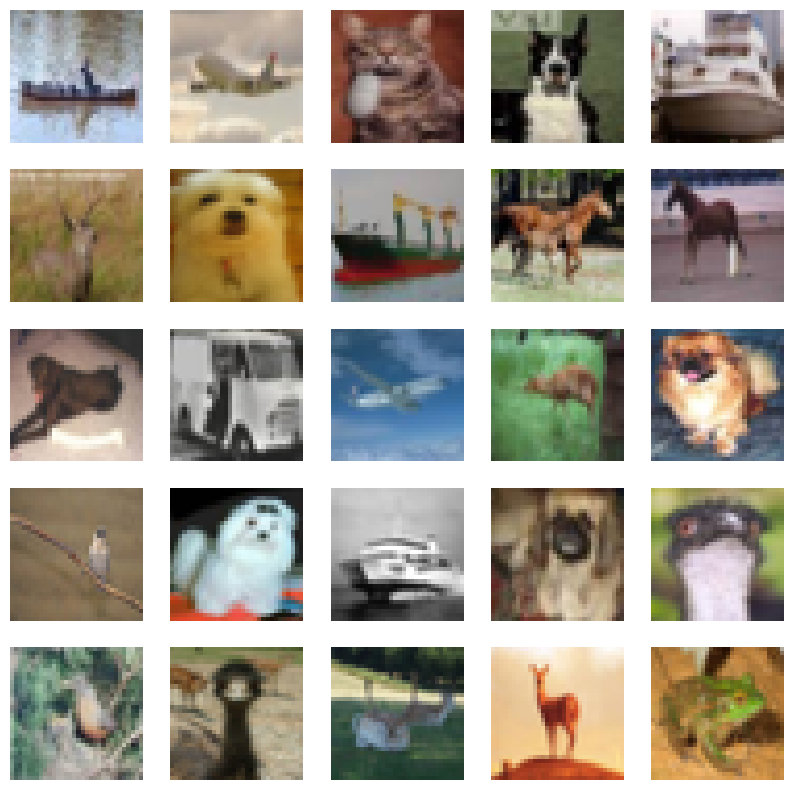

In [5]:
ROWS = 5 #Mostra as imagens aleatórias usadas para o teste

y = X_test.astype("uint8")

fig, axes1 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes1[j][k].set_axis_off()
    axes1[j][k].imshow(y[i:i+1][0])

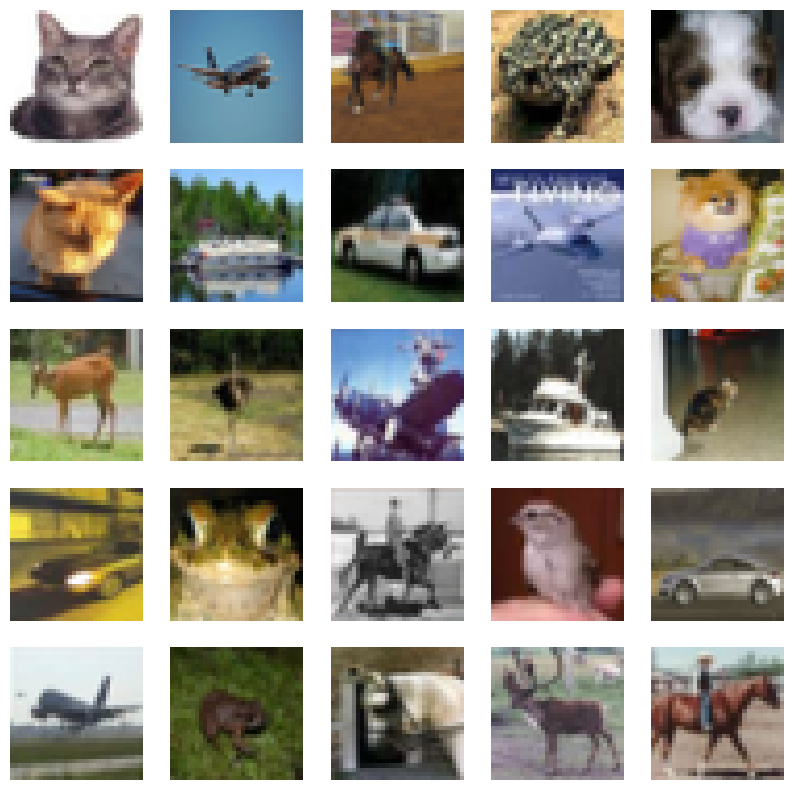

In [6]:
ROWS = 5

y = X_train.astype("uint8") #Mostra as imagens aleatórias para o treinamento

fig, axes2 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes2[j][k].set_axis_off()
    axes2[j][k].imshow(y[i:i+1][0])

In [7]:
# Pré processamento dos dados

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [9]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
# Pré processamento dos Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [11]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [12]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [13]:
#  Dividindo conjuntos de treinamento e de validação

X_val = X_test[:5000]
y_val = y_test[:5000]

X_test = X_test[5000:]
y_test = y_test[5000:]

In [14]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3),
 (50000, 10),
 (5000, 32, 32, 3),
 (5000, 10),
 (5000, 32, 32, 3),
 (5000, 10))

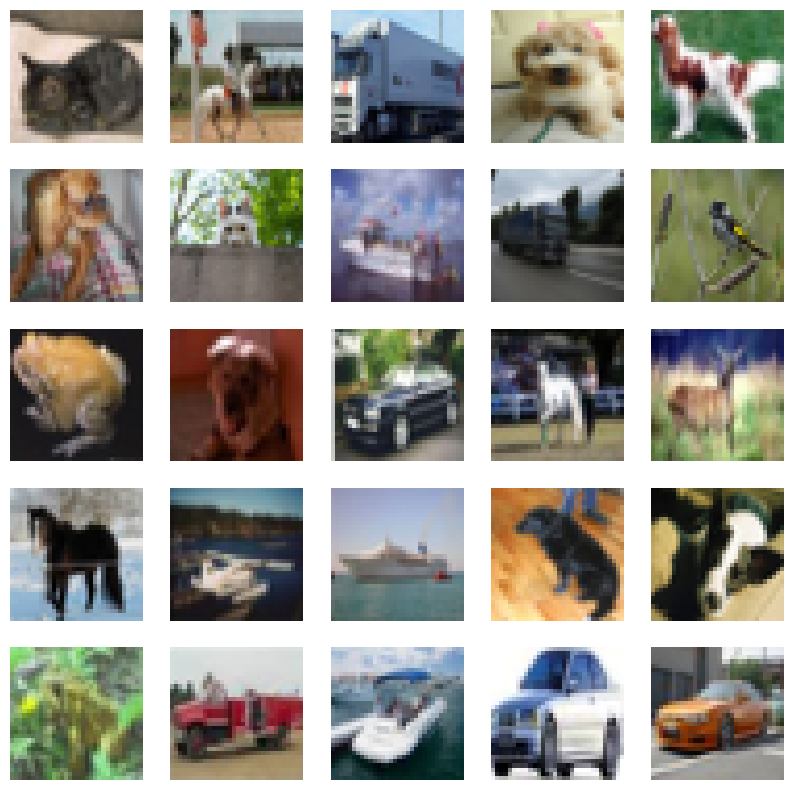

In [15]:
ROWS = 5

y = X_val.astype("float32") #Mostra imagens aleatórias usadas para a validação

fig, axes3 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes3[j][k].set_axis_off()
    axes3[j][k].imshow(y[i:i+1][0])

In [16]:
# Argumentação dos dados

datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
datagen.fit(X_train)

In [29]:
# Construindo o modelo CNN

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

2025-11-01 00:31:54.149228: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400


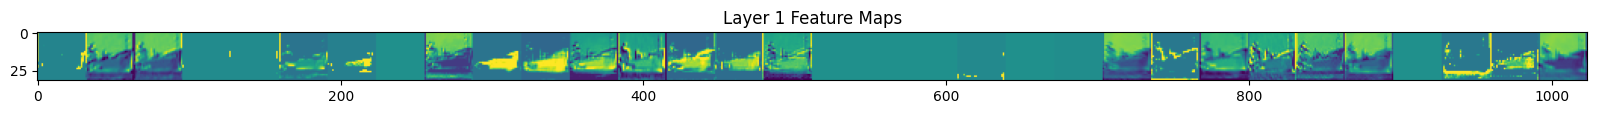

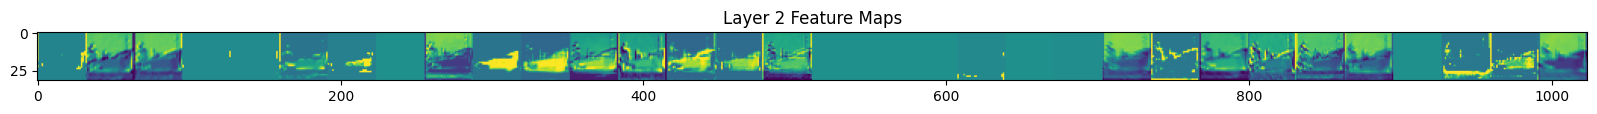

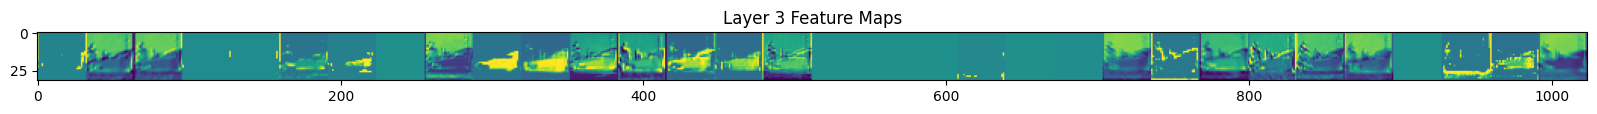

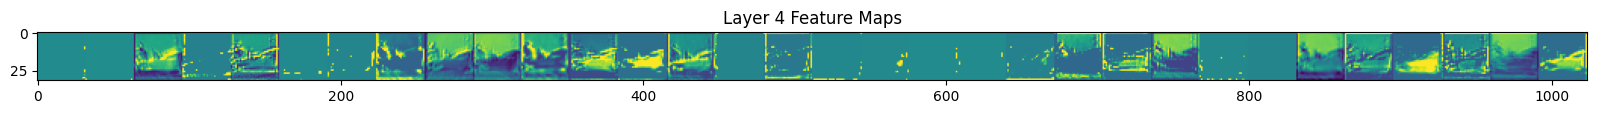

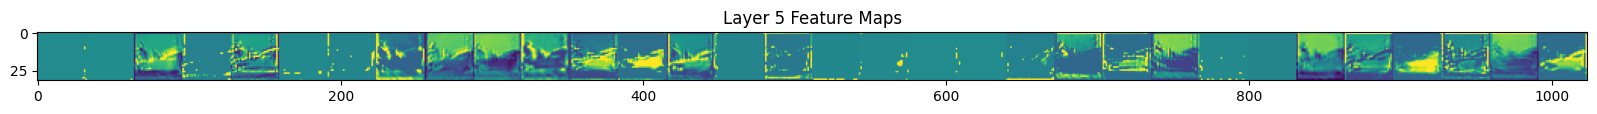

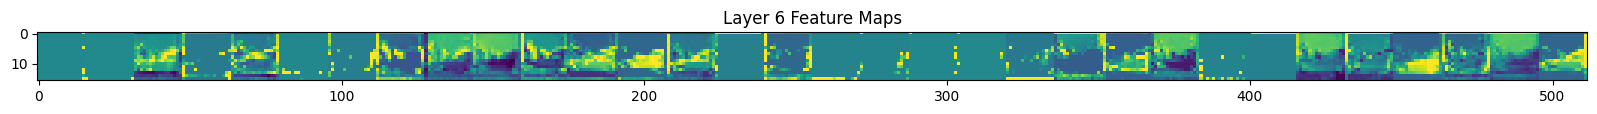

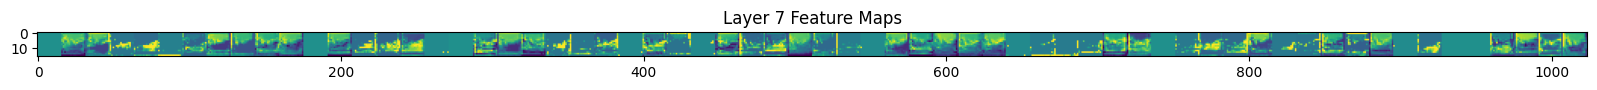

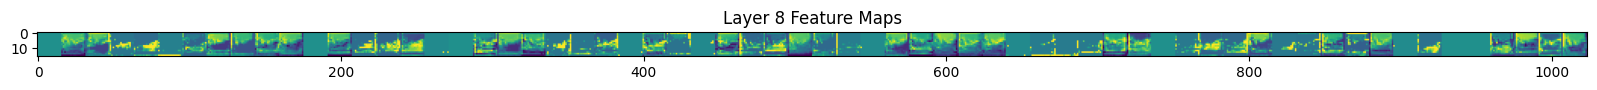

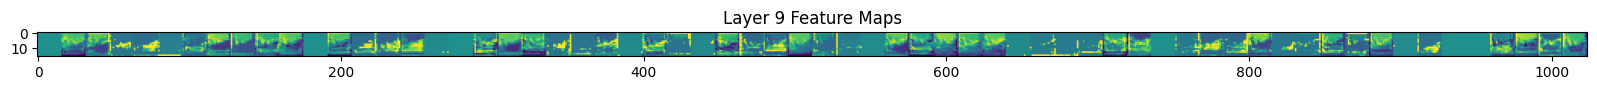

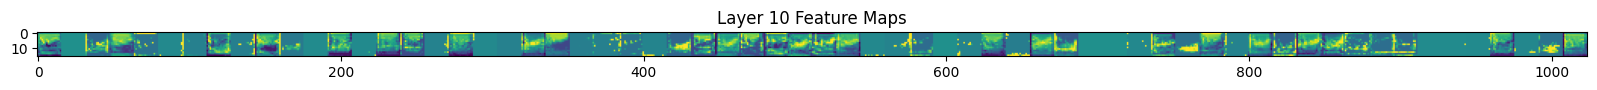

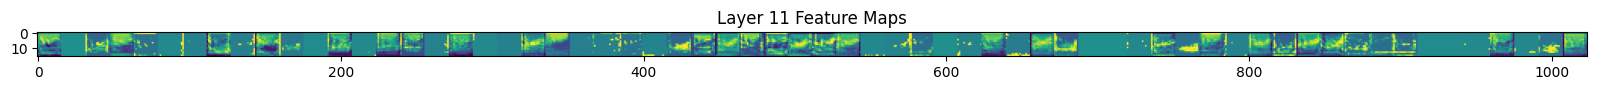

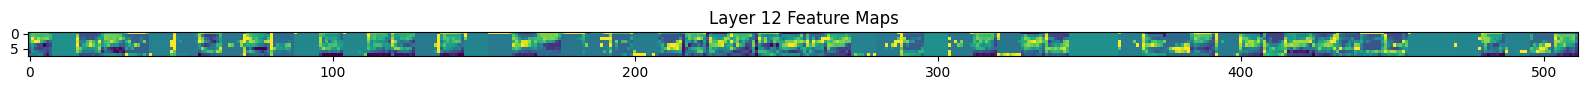

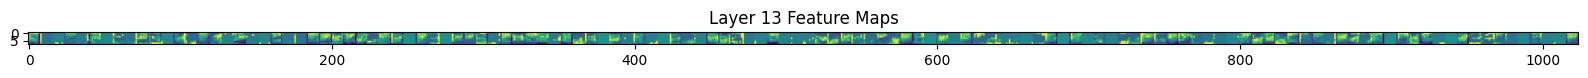

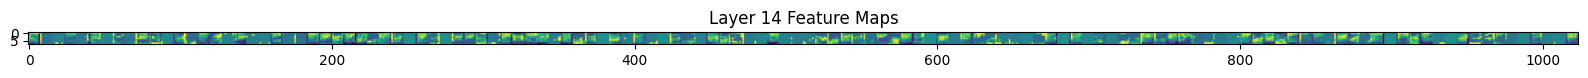

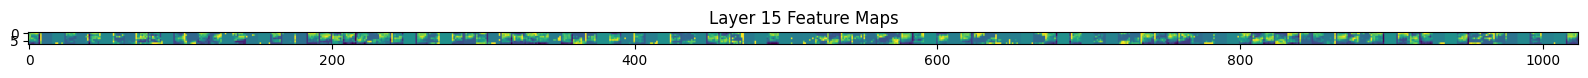

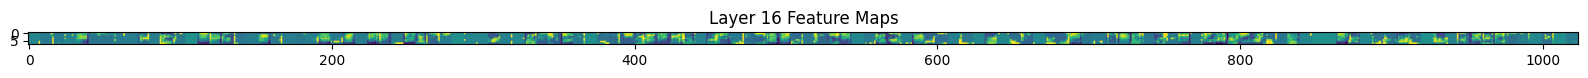

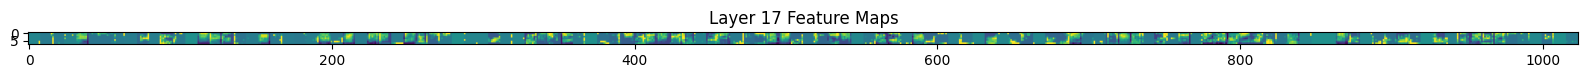

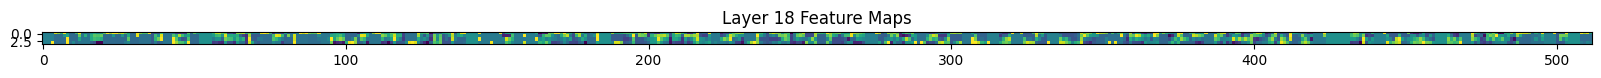

In [18]:
# Feature Map Visualization - Run this AFTER compiling the model
# This creates a simple visualization of the convolutional layers

print("Note: Run this cell AFTER compiling the model for proper visualization")
print("For now, this cell will prepare the visualization function")

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [20]:
# Compilando o modelo

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Visualização das Feature Maps - Execute após compilar o modelo
# Create visualization model after the model is compiled
try:
    # Get intermediate outputs from convolutional layers
    layer_outputs = []
    layer_names = []
    
    for layer in model.layers:
        if 'conv2d' in layer.name:  # Only get conv2d layers
            layer_outputs.append(layer.output)
            layer_names.append(layer.name)
    
    if layer_outputs:
        # Create visualization model
        visualization_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
        
        # Get a test image
        test_image = X_test[2:3].astype("float32")
        
        # Get feature maps
        feature_maps = visualization_model.predict(test_image, verbose=0)
        
        # Visualize each layer's feature maps
        for layer_name, feature_map in zip(layer_names, feature_maps):
            n_features = min(feature_map.shape[-1], 32)  # Limit to first 32 features
            size = feature_map.shape[1]
            
            # Create display grid
            n_cols = 8
            n_rows = n_features // n_cols
            if n_features % n_cols:
                n_rows += 1
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
            fig.suptitle(f'Feature Maps - {layer_name}')
            
            for i in range(n_features):
                row = i // n_cols
                col = i % n_cols
                
                if n_rows == 1:
                    ax = axes[col] if n_cols > 1 else axes
                else:
                    ax = axes[row, col] if n_cols > 1 else axes[row]
                
                # Get and process feature map
                fmap = feature_map[0, :, :, i]
                ax.imshow(fmap, cmap='viridis')
                ax.axis('off')
                ax.set_title(f'Filter {i+1}')
            
            # Hide empty subplots
            for i in range(n_features, n_rows * n_cols):
                row = i // n_cols
                col = i % n_cols
                if n_rows == 1:
                    ax = axes[col] if n_cols > 1 else axes
                else:
                    ax = axes[row, col] if n_cols > 1 else axes[row]
                ax.axis('off')
            
            plt.tight_layout()
            plt.show()
    
    print("Feature map visualization completed!")
    
except Exception as e:
    print(f"Visualization not available yet. Compile the model first. Error: {e}")
    print("This cell should be run AFTER model compilation.")

In [21]:
# Criando o Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [22]:
# Fazendo o Treinamento do modelo

history = model.fit(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16


2025-11-01 00:31:58.938929: I external/local_xla/xla/service/service.cc:163] XLA service 0x780c54002e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-01 00:31:58.938964: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-11-01 00:31:59.048682: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-01 00:31:59.978385: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3123', 8 bytes spill stores, 8 bytes spill loads

2025-11-01 00:31:59.978385: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3123', 8 bytes spill stores, 8 bytes spill 

  18/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1258 - loss: 3.4723 

I0000 00:00:1761967924.539282    5364 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1998/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3242 - loss: 2.0968

2025-11-01 00:32:13.750441: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_265', 8 bytes spill stores, 8 bytes spill loads



2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.4153 - loss: 1.7126 - val_accuracy: 0.5790 - val_loss: 1.2107 - learning_rate: 0.0010
Epoch 2/16
   1/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4000 - loss: 1.6311Epoch 2/16
 500/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5404 - loss: 1.2831

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5530 - loss: 1.2640 - val_accuracy: 0.6042 - val_loss: 1.2462 - learning_rate: 0.0010
Epoch 3/16
Epoch 3/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6069 - loss: 1.1145 - val_accuracy: 0.6214 - val_loss: 1.1759 - learning_rate: 0.0010
Epoch 4/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6069 - loss: 1.1145 - val_accuracy: 0.6214 - val_loss: 1.1759 - learning_rate: 0.0010
Epoch 4/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.6441 - loss: 1.0330 - val_accuracy: 0.6888 - val_loss: 0.9370 - learning_rate: 0.0010
Epoch 5/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.6441 - loss: 1.0330 - val_accuracy: 0.6888 - val_loss: 0.9370 - learning_rate: 0.0010
Epoch 5/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6693 - loss: 0.9563 - val_accuracy: 0.6798 - val_loss: 1.1863 - learning_rate: 0.0010
Epoch 6/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

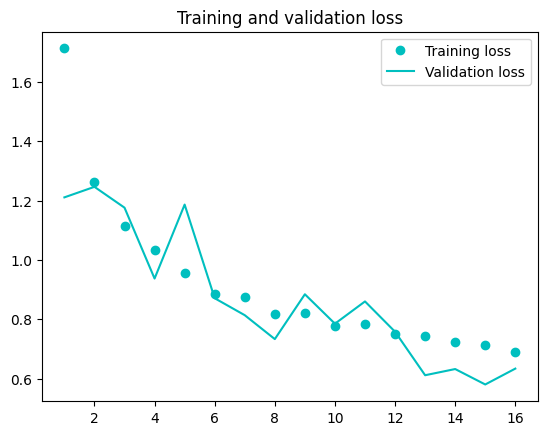

In [24]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

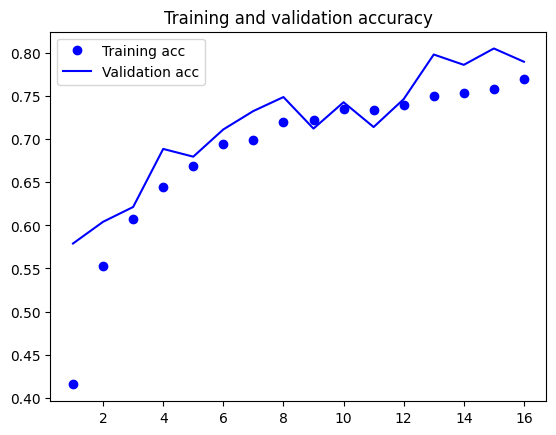

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [26]:
# Testando modelo

test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

142/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.6206

2025-11-01 00:34:04.033959: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_286', 8 bytes spill stores, 8 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ -0s 8ms/step - accuracy: 0.7906 - loss: 0.6107
157/157 ━━━━━━━━━━━━━━━━━━━━ -0s 8ms/step - accuracy: 0.7906 - loss: 0.6107


(0.6107211709022522, 0.7906000018119812)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


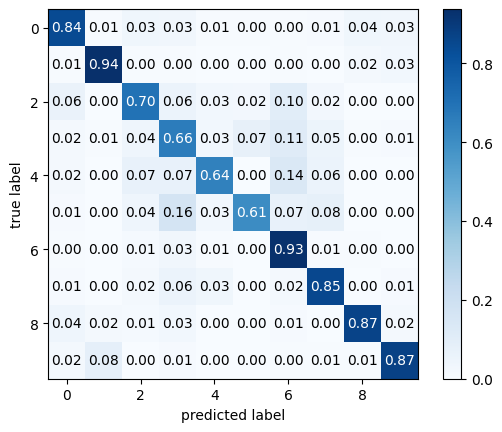

In [27]:
#matriz de confusão model
y_pred = model.predict(X_test)
y_test.argmax(axis=1).shape, y_pred.argmax(axis=1).shape

multiclass = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax = plot_confusion_matrix(multiclass, colorbar=True, show_absolute=False, show_normed=True)
ax.margins(10,10) #just change the values til adjust to your screen.
plt.show()

Agora é feita a repetição das criação de um modelo CNN para analisar os dados obtidos. Vamos criar 2 novos modelos, model1 e model2.

In [1]:
# Construindo o modelo CNN (model1)

model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation = 'softmax'))

NameError: name 'models' is not defined

In [ ]:
model1.summary()

In [ ]:
# Compilando o modelo (model1)

model1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Visualização das Feature Maps do Model1 - Execute após compilar o modelo
# Create visualization model after the model is compiled
try:
    # Get intermediate outputs from convolutional layers
    layer_outputs1 = []
    layer_names1 = []
    
    for layer in model1.layers:
        if 'conv2d' in layer.name:  # Only get conv2d layers
            layer_outputs1.append(layer.output)
            layer_names1.append(layer.name)
    
    if layer_outputs1:
        # Create visualization model
        visualization_model1 = tf.keras.models.Model(inputs=model1.input, outputs=layer_outputs1)
        
        # Get a test image
        test_image = X_test[2:3].astype("float32")
        
        # Get feature maps
        feature_maps1 = visualization_model1.predict(test_image, verbose=0)
        
        # Visualize each layer's feature maps
        for layer_name, feature_map in zip(layer_names1, feature_maps1):
            n_features1 = min(feature_map.shape[-1], 32)  # Limit to first 32 features
            size1 = feature_map.shape[1]
            
            # Create display grid
            n_cols = 8
            n_rows = n_features1 // n_cols
            if n_features1 % n_cols:
                n_rows += 1
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
            fig.suptitle(f'Feature Maps Model1 - {layer_name}')
            
            for i in range(n_features1):
                row = i // n_cols
                col = i % n_cols
                
                if n_rows == 1:
                    ax = axes[col] if n_cols > 1 else axes
                else:
                    ax = axes[row, col] if n_cols > 1 else axes[row]
                
                # Get and process feature map
                fmap = feature_map[0, :, :, i]
                ax.imshow(fmap, cmap='viridis')
                ax.axis('off')
                ax.set_title(f'Filter {i+1}')
            
            # Hide empty subplots
            for i in range(n_features1, n_rows * n_cols):
                row = i // n_cols
                col = i % n_cols
                if n_rows == 1:
                    ax = axes[col] if n_cols > 1 else axes
                else:
                    ax = axes[row, col] if n_cols > 1 else axes[row]
                ax.axis('off')
            
            plt.tight_layout()
            plt.show()
    
    print("Feature map visualization para Model1 completada!")
    
except Exception as e:
    print(f"Visualização não disponível ainda. Compile o model1 primeiro. Erro: {e}")
    print("Esta célula deve ser executada APÓS a compilação do modelo.")

In [ ]:
# Criando o Callback (model1)

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [ ]:
# Fazendo o Treinamento

history1 = model1.fit(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

In [ ]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

In [ ]:
epochs1 = range(1, len(acc1) + 1)

plt.plot(epochs1, loss1, 'co', label='Training loss')
plt.plot(epochs1, val_loss1, 'c', label='Validation loss')
plt.title('Training and validation loss - model1')
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs1, acc1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy - model1')
plt.legend()
plt.show()

In [ ]:
# Testando (model1)

test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss1, test_acc1

In [ ]:
#matriz de confusão model1
y_pred1 = model1.predict(X_test)
y_test.argmax(axis=1).shape, y_pred1.argmax(axis=1).shape

multiclass1 = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(axis=1))
class_names1 = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax1 = plot_confusion_matrix(multiclass1, colorbar=True, show_absolute=False, show_normed=True)
ax1.margins(10,10) #just change the values til adjust to your screen.
plt.show()

Parte referente ao modelo 2 (model2)

In [ ]:
# Construindo o modelo CNN (model2)

model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2, 2))

#----------------------------------------------------------------------------
# Define um novo modelo onde a entrada é uma imagem de teste qualquer
# Saída é representada pelas camadas intermediárias  
# do antigo modelo depois do primeiro
successive_outputs2 = [layer.output for layer in model2.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model2 = tf.keras.models.Model(inputs = model2.input, outputs = successive_outputs2)
#y = a imagem selecionada aleatóriamente para teste.
x = X_test.astype("float32")
y = x[2:3]
# Vamos rodar a imagem na rede de visualização
# para obter todas as representações intermediárias da imagem
successive_feature_maps2 = visualization_model2.predict(y)
# Recebe o nome das layers e então são colocadas no gráfico
layer_names = [layer.name for layer in model2.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps2):
  #print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plota o mapa de características para a Conv2D até o maxpool layers, e não os layers totalmente conectados
   
    n_features2 = feature_map.shape[-1]  # numero de características no mapa de características
    size2       = feature_map.shape[ 1]  # formato do mapa de caraterísticas (1, size, size, n_features)
    # Iremos intitular nossas imagens nessa matrix
    display_grid2 = np.zeros((size2, size2 * n_features2))
    
    # Pós processamento da característica na forma visual
    for i in range(n_features2):
      y  = feature_map[0, :, :, i]
      y -= y.mean()
      y /= y.std ()
      y *=  64
      y += 128
      y  = np.clip(y, 0, 255).astype('uint8')
      # Coloca cada filtro na forma horizontal
      display_grid2[:, i * size2 : (i + 1) * size2] = y
# Mostra a divisão e a imagem do mapa de características
    scale2 = 20. / n_features2
    plt.figure( figsize=(scale2 * n_features2, scale2) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid2, aspect='auto', cmap='viridis' )
#----------------------------------------------------------------------------
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model2.summary()

In [ ]:
# Compilando o modelo (model1)

model2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Criando o Callback (model1)

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [ ]:
# Fazendo o Treinamento

history2 = model2.fit(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

In [ ]:
epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, loss2, 'co', label='Training loss')
plt.plot(epochs2, val_loss2, 'c', label='Validation loss')
plt.title('Training and validation loss - model2')
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy - model2')
plt.legend()
plt.show()

In [ ]:
# Testando

test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss2, test_acc2

In [ ]:
#matriz de confusão model2
y_pred2 = model2.predict(X_test)
y_test.argmax(axis=1).shape, y_pred2.argmax(axis=1).shape

multiclass2 = confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))
class_names2 = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax2 = plot_confusion_matrix(multiclass2, colorbar=True, show_absolute=False, show_normed=True)
ax2.margins(10,10) #just change the values til adjust to your screen.
plt.show()